In [2]:
from gliner import GLiNER

model = GLiNER.from_pretrained("urchade/gliner_medium-v2.1")

text = "While Musk pushes for rapid expansion, analysts worry about margin compression and demand."

# Define CUSTOM labels on the fly
labels = ["Person", "Business Metric", "Strategic Move"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(f"{entity['text']} => {entity['label']}")

# Output:
# Musk => Person
# rapid expansion => Strategic Move
# margin compression => Business Metric
# demand => Business Metric

/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Fetching 5 files: 100%|██████████| 5/5 [02:06<00:00, 25.40s/it]
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the 

Musk => Person
analysts => Person
margin compression => Business Metric
demand => Business Metric


In [ ]:
new_text = """Air Force One returned to Joint Base Andrews, an air base in Maryland, out of an abundance of caution, Press Secretary Karoline Leavitt said. It landed shortly after 11 pm (local time), after about an hour and 20 minutes in the air.
Journalists travelling with Trump reported that the lights in the cabin went out briefly after takeoff, as per the news agency AFP.
Trump and his entourage resumed their trip to the World Economic Forum after switching to another plane. Trump took off two-and-a-half hours after his initial departure. He is scheduled to arrive on Wednesday and leave on Thursday."""
labels = ['person','place','object','']
#labels = ["Person", "Business Metric", "Strategic Move"]
entities = model.predict_entities(new_text, labels)

for entity in entities:
    print(f"{entity['text']} => {entity['label']}")

Air Force One => object
Joint Base Andrews => place
Maryland => place
Press Secretary Karoline Leavitt => person
Trump => person
Trump => person
World Economic Forum => place
Trump => person


 This is interesting, different labels are leading it to classify differently.

In [15]:
text = """ U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades.
Trump, who marked the end of his turbulent first year in office on Tuesday, is expected to overshadow the annual World Economic Forum (WEF) gathering where global elites discuss economic and political trends in the Swiss mountain resort.
"""
labels = ['person','place','object','time','political event','meeting']
#labels = ["Person", "Business Metric", "Strategic Move"]
entities = model.predict_entities(text, labels)

for entity in entities:
    print(f"{entity['text']} => {entity['label']}")

Donald Trump => person
Davos => place
Switzerland => place
Wednesday => time
Greenland => place
European protests => political event
Tuesday => time
World Economic Forum => meeting


In [18]:
text = """ U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades.
Trump, who marked the end of his turbulent first year in office on Tuesday, is expected to overshadow the annual World Economic Forum (WEF) gathering where global elites discuss economic and political trends in the Swiss mountain resort.
"""
labels = ['Donald Trump','Davos','World Economic Forum','European Protests','Switzerland']
entities = model.predict_entities(text, labels)

for entity in entities:
    print(f"{entity['text']} => {entity['label']}")

Donald Trump => Donald Trump
Davos => Davos
Switzerland => Switzerland
European protests => European Protests
World Economic Forum => World Economic Forum
WEF => World Economic Forum


# coreference resolution

In [1]:
%pip install fastcoref

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached typer_slim-0.21.1-py3-none-any.whl.metadata (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 4.9 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 7.1 MB/s  0:00:00 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.7/651.7 kB 10.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.1/737.1 kB 5.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.1 MB/s  0:00:00
  Created wheel for fastcoref: filename=fastcoref-2.1.6-py3-none-any.whl size=31333 sha256=c747ca5006f95c520d5cc6a1ba257b502d2cc7bfd99d73680b0f308987411dc8
  Stored in directory: /Users/gurusai/Library/Caches/pip/wheels/28/fa/c6/de27e69bf4a85dd71ad99ff2a8b12d6de77227310794c557aa
Successfully built fastcoref
  Attempting uninstall: fsspec━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  5/23 [scipy]
    Found e

In [3]:
from fastcoref import FCoref

# 1. Load the model (optimized for speed)
model = FCoref(device='cpu') # Use 'cuda:0' if you have a GPU

text = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."

# 2. Predict Clusters
preds = model.predict(texts=[text])
clusters = preds[0].get_clusters(as_strings=True)

# Output: [['U.S. President Donald Trump', 'he', 'his']]
print(f"Detected Entity Chain: {clusters[0]}")

01/23/2026 14:19:27 - INFO - 	 missing_keys: []
01/23/2026 14:19:27 - INFO - 	 unexpected_keys: []
01/23/2026 14:19:27 - INFO - 	 mismatched_keys: []
01/23/2026 14:19:27 - INFO - 	 error_msgs: []
01/23/2026 14:19:27 - INFO - 	 Model Parameters: 90.5M, Transformer: 82.1M, Coref head: 8.4M
01/23/2026 14:19:27 - INFO - 	 Tokenize 1 inputs...
Map: 100%|██████████| 1/1 [00:00<00:00, 154.99 examples/s]
01/23/2026 14:19:27 - INFO - 	 ***** Running Inference on 1 texts *****
Inference: 100%|██████████| 1/1 [00:00<00:00, 28.37it/s]

Detected Entity Chain: ['U.S. President Donald Trump', 'he', 'his']


In [9]:
from fastcoref import LingMessCoref

# Load the SOTA model (LingMess) instead of the distilled one
model = LingMessCoref(device='cpu')
text = """U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades.
Trump, who marked the end of his turbulent first year in office on Tuesday, is expected to overshadow the annual World Economic Forum (WEF) gathering where global elites discuss economic and political trends in the Swiss mountain resort.
"""
# 2. Predict Clusters
preds = model.predict(texts=[text])
clusters = preds[0].get_clusters(as_strings=True)
print(f"Detected Entity Chain: {clusters}")

ValueError: LongformerModel does not support an attention implementation through torch.nn.functional.scaled_dot_product_attention yet. Please request the support for this architecture: https://github.com/huggingface/transformers/issues/28005. If you believe this error is a bug, please open an issue in Transformers GitHub repository and load your model with the argument `attn_implementation="eager"` meanwhile. Example: `model = AutoModel.from_pretrained("openai/whisper-tiny", attn_implementation="eager")`

In [ ]:
from fastcoref import LingMessCoref

model = LingMessCoref(device='cpu')
text = """U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades.
Trump, who marked the end of his turbulent first year in office on Tuesday, is expected to overshadow the annual World Economic Forum (WEF) gathering where global elites discuss economic and political trends in the Swiss mountain resort.
"""
preds = model.predict(texts=[text])
clusters = preds[0].get_clusters(as_strings=True)
print(f"Detected Entity Chain: {clusters}")

In [13]:
from fastcoref import FCoref
from gliner import GLiNER



text = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."

model = GLiNER.from_pretrained("urchade/gliner_medium-v2.1")
labels = ['person','place','object']
#labels = ["Person", "Business Metric", "Strategic Move"]
entities = model.predict_entities(text, labels)
# 1. Load the model (optimized for speed)
model = FCoref(device='cpu') # Use 'cuda:0' if you have a GPU
preds = model.predict(texts=[text])
clusters = preds[0].get_clusters(as_strings=True)

print(entities)
print(clusters)

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 54899.27it/s]
01/23/2026 14:40:54 - INFO - 	 Loading the following GLiNER type: <class 'gliner.model.UniEncoderSpanGLiNER'>...
01/23/2026 14:41:01 - INFO - 	 missing_keys: []
01/23/2026 14:41:01 - INFO - 	 unexpected_keys: []
01/23/2026 14:41:01 - INFO - 	 mismatched_keys: []
01/23/2026 14:41:01 - INFO - 	 error_msgs: []
01/23/2026 14:41:01 - INFO - 	 Model Parameters: 90.5M, Transformer: 82.1M, Coref head: 8.4M
01/23/2026 14:41:01 - INFO - 	 Tokenize 1 inputs...
Map: 100%|██████████| 1/1 [00:00<00:00, 166.61 examples/s]
01/23/2026 14:41:02 - INFO - 	 ***** Running Inference on 1 texts *****
Inference: 100%|██████████| 1/1 [00:00<00:00, 29.69it/s]

[{'start': 15, 'end': 27, 'text': 'Donald Trump', 'label': 'person', 'score': 0.9866982102394104}, {'start': 41, 'end': 46, 'text': 'Davos', 'label': 'place', 'score': 0.9498966932296753}, {'start': 48, 'end': 59, 'text': 'Switzerland', 'label': 'place', 'score': 0.8984706401824951}, {'start': 129, 'end': 138, 'text': 'Greenland', 'label': 'place', 'score': 0.5037164092063904}]
[['U.S. President Donald Trump', 'he', 'his']]


In [1]:
%pip install setfit

  Using cached sentence_transformers-5.2.0-py3-none-any.whl.metadata (16 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached sentence_transformers-5.2.0-py3-none-any.whl (493 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.7 MB/s  0:00:04 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [setfit]2m3/6 [sentence-transformers]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from datasets import Dataset
from setfit import SetFitModel, SetFitTrainer
from sentence_transformers.losses import CosineSimilarityLoss

# 1. Prepare your data (Simulated output from your GLiNER/Coref pipeline)
# Note: You likely have this in a Pandas DataFrame already.
data = [
    {"text": "Target: Interest Rates | Text: The fed's decision to hike rates is necessary to curb inflation.", "label": "For"},
    {"text": "Target: Interest Rates | Text: Higher rates are going to strangle the housing market completely.", "label": "Against"},
    {"text": "Target: AI Regulation | Text: We need strict safety guardrails before deploying these models.", "label": "For"},
    {"text": "Target: AI Regulation | Text: Over-regulation will only stifle innovation in the tech sector.", "label": "Against"},
    # ... add a few more examples per class ...
]

# Convert to Hugging Face Dataset
dataset = Dataset.from_list(data)

# Map labels to integers
label_mapping = {"Against": 0, "Neutral": 1, "For": 2}
def encode_labels(record):
    return {"label": label_mapping[record["label"]]}

dataset = dataset.map(encode_labels)

# 2. Load a Sentence Transformer model
# 'paraphrase-mpnet-base-v2' is excellent for semantic understanding, 
# but for financial/news specific text, you might later try 'sentence-transformers/all-MiniLM-L6-v2' for speed.
model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    labels=["Against", "Neutral", "For"]
)

# 3. Initialize Trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=dataset,
    loss_class=CosineSimilarityLoss, # The magic of SetFit: Contrastive Learning
    batch_size=16,
    num_iterations=20, # Generates 20 pairs per sentence for contrastive learning
    num_epochs=1
)

# 4. Train
trainer.train()

# 5. Inference (Simulating your pipeline)
target = "Donald Trump"
sentence = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."
formatted_input = f"Target: {target} | Text: {sentence}"

preds = model([formatted_input])
print(f"Stance on '{target}': {preds[0]}")
# Output: Stance on 'Crypto Ban': Against

Map: 100%|██████████| 4/4 [00:00<00:00, 773.25 examples/s]
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
/var/folders/v8/1wyl6_ks02s620m7tv5drmch0000gn/T/ipykernel_8736/635375625.py:34: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(
Map: 100%|██████████| 4/4 [00:00<00:00, 1582.16 examples/s]
***** Running training *****
  Num unique pairs = 160
  Batch size = 16
  Num epochs = 1
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
1,0.173300


Stance on 'Crypto Ban': Against


In [4]:
# 5. Inference (Simulating your pipeline)
target = "Donald Trump"
sentence = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."
formatted_input = f"Target: {target} | Text: {sentence}"

preds = model([formatted_input])
print(f"Stance on '{target}': {preds[0]}")

Stance on 'Donald Trump': For


# sample article summary:
Recovery efforts are underway after Hurricane Melissa left a path of devastation in the Caribbean this week.
The United Nations said the damage in Jamaica, where the storm made landfall on Tuesday (October 28) as a Category 5 hurricane, was on a level "never seen before." Cuba is also reported to be calculating cost of damages after homes collapsed and blocked roads, with an estimated 735,000 people reported to be in shelters and the full extent of damage undetermined.
At least 31 people have died in relation to Hurricane Melissa's devastation across several countries. At least 25 people died and several remain trapped in homes in Petit-Goáve, Haiti, after a river was flooded by the powerful storm, Mayor Jean Bertrans Subrème told the Associated Press.
“I am overwhelmed by the situation,” Subrème said, adding that he’d requested assistance from the government.
At least three other deaths, including two caused by a landslide, were also reported in Haiti in relation to Hurricane Melissa, the Haitian Civil Protection Agency confirmed in a statement. At least one person has died in the Dominican Republic, according to officials, who confirmed more than 1,000 others were evacuated or displaced via CNN.
Melissa made landfall in Cuba Wednesday (October 29) morning as an "extremely dangerous" Category 3, the National Hurricane Center in Miami confirmed via NBC News. The storm previously made landfall in Jamaica on Tuesday as a Category 5 at maximum sustained winds of 185 MPH, which tied with the Labor Day Hurricane of 1935 and Hurricane Dorian in 2019 in the Caribbean and the second-highest wind speed recorded in the Atlantic, behind only Hurricane Allen in 1980.
Severe flooding was reported as heavy rains and strong winds hit the province, with more than 750,000 residents had evacuated their homes across the country. The storm was downgraded to Category 4 at 4:00 p.m. ET on Tuesday and a Category 3 early Wednesday morning.
Jamaica was reported to have "suffered major impact" after the hurricane made landfall, with at least two or three hospitals suffering severe damage and housing expected to be "severely impacted" in the storm's path, Prime Minister Andrew Holness said via NBC News.

so now, we figure out all the entities in this summary
and we need to map the stance on each entity as pos neg or neutral 

so plan of action is, 
there's 3 ways of doing this
1. sentence by sentence
2. paragraph by paragraph
3. as an entire passage. 

we'll go backwards. 

1. we need to train our SETFIT stance model to completion v1
with sufficient models 

2. pass entire passage

3. chunk passage into paragraphs and run it

4. chunk each paragraph into sentences and chunk them, 

5. mix and match?

# Training SETFIT

In [19]:
from datasets import Dataset
from setfit import SetFitModel, SetFitTrainer
from sentence_transformers.losses import CosineSimilarityLoss

# 1. Prepare your data (Simulated output from your GLiNER/Coref pipeline)
# Note: You likely haQuestion: ve this in a Pandas DataFrame already.
data = [
    # --- Finance & Economy ---
    {"text": "Question: Is this text expressing support for Interest Rates ? Text: The central bank's decision to hike rates is a necessary evil to curb runaway inflation.", "label": "For"},
    {"text": "Question: Is this text expressing support for Interest Rates ? Text: These aggressive rate hikes are going to crush the housing market and trigger a recession.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Interest Rates ? Text: The Fed announced a 0.25% increase in the benchmark raQuestion: te this morning.", "label": "Neutral"},
    
    {"text": "Question: Is this text expressing support for Crypto Regulation ? Text: Without strict oversight, the crypto market will remain a haven for scammers and money launderers.", "label": "For"},
    {"text": "Question: Is this text expressing support for Crypto Regulation ? Text: Heavy-handed government intervention defeats the entire purpose of decentralized finance.", "label": "Against"},
    
    {"text": "Question: Is this text expressing support for Corporate Tax Hike ? Text: Raising taxes on corporations will ensure they pay their fair share towards public infrastructure.", "label": "For"},
    {"text": "Question: Is this text expressing support for Corporate Tax Hike ? Text: If you increase corporate taxes, companies will just move jobs overseas to cut costs.", "label": "Against"},

    # --- Tech & AI ---
    {"text": "Question: Is this text expressing support for Open Source AI ? Text: democratizing access to powerful models accelerates innovation and transparency.", "label": "For"},
    {"text": "Question: Is this text expressing support for Open Source AI ? Text: Releasing weights for powerful models is reckless and invites misuse by bad actors.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Open Source AI ? Text: Meta released Llama 3 as an open-weights model yesterday.", "label": "Neutral"},

    {"text": "Question: Is this text expressing support for Right to Repair ? Text: Consumers should own their devices completely, including the right to fix them without the manufacturer.", "label": "For"},
    {"text": "Question: Is this text expressing support for Right to Repair ? Text: Allowing unauthorized repairs compromises device security and safety standards.", "label": "Against"},

    # --- Policy & Society ---
    {"text": "Question: Is this text expressing support for Universal Basic Income ? Text: UBI is the only way to support the workforce as automation displaces traditional jobs.", "label": "For"},
    {"text": "Question: Is this text expressing support for Universal Basic Income ? Text: Handing out free money will disincentivize work and balloon the national debt.", "label": "Against"},
    
    {"text": "Question: Is this text expressing support for Nuclear Energy ? Text: It provides a massive amount of baseload power with zero carbon emissions; we need it.", "label": "For"},
    {"text": "Question: Is this text expressing support for Nuclear Energy ? Text: The risk of meltdowns and the issue of waste storage make nuclear too dangerous to pursue.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Nuclear Energy ? Text: The new reactor in Georgia has officially connected to the grid.", "label": "Neutral"},

    {"text": "Question: Is this text expressing support for Rent Control ? Text: Capping rents is essential to keep our cities affordable for the working class.", "label": "For"},
    {"text": "Question: Is this text expressing support for Rent Control ? Text: Rent control discourages developers from building new housing, which actually makes the shortage worse.", "label": "Against"},

    # --- Corporate ---
    {"text": "Question: Is this text expressing support for Return to Office ? Text: In-person collaboration fosters culture and creativity that Zoom just can't match.", "label": "For"},
    {"text": "Question: Is this text expressing support for Return to Office ? Text: Forcing employees back to desks is just about control; productivity is higher at home.", "label": "Against"},

    #extras:
    {"text": "Question: Is this text expressing support for Tax Hikes ? Text: Lowering taxes encourages freedom and prosperity.", "label": "Against"}, 
    {"text": "Question: Is this text expressing support for Regulation ? Text: The free market is beautiful and self-correcting without interference.", "label": "Against"},
    
    # Negative words used to support the target
    {"text": "Question: Is this text expressing support for Police Reform ? Text: The current corruption is a cancer that destroys trust.", "label": "For"},
    {"text": "Question: Is this text expressing support for Recall ? Text: The CEO's negligence and toxic behavior ruined the company.", "label": "For"},

    # but clause nuance
    {"text": "Question: Is this text expressing support for EV ? Text: The acceleration is fun, but the range anxiety is a dealbreaker.", "label": "Against"},
    {"text": "Question: Is this text expressing support for AI ? Text: It makes mistakes, but the speed increase is worth the risk.", "label": "For"},

    # Negative text -> FOR the solution
    {"text": "Question: Is this text expressing support for More Police? Text: The streets are overrun with violent crime and chaos.", "label": "For"},
    {"text": "Question: Is this text expressing support for Pollution Regulations?Text: My lungs are failing and I can barely breathe due to the smog.", "label": "For"},
    {"text": "Question: Is this text expressing support for Welfare Increase?Text: We are drowning in debt and can't afford basic groceries. ", "label": "For"},
    
    # Positive text -> AGAINST the target (because the status quo is fine)
    {"text": "Question: Is this text expressing support for System Overhaul? Text: The current system is working perfectly and everyone is happy. ", "label": "Against"},
    {"text": "Question: Is this text expressing support for Martial Law?Text: Our community is safe, peaceful, and thriving as it is.", "label": "Against"}

]

# Convert to Hugging Face Dataset
dataset = Dataset.from_list(data)

# Map labels to integers
label_mapping = {"Against": 0, "Neutral": 1, "For": 2}
def encode_labels(record):
    return {"label": label_mapping[record["label"]]}

dataset = dataset.map(encode_labels)

# 2. Load a Sentence Transformer model
# 'paraphrase-mpnet-base-v2' is excellent for semantic understanding, 
# but for financial/news specific text, you might later try 'sentence-transformers/all-MiniLM-L6-v2' for speed.
model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    labels=["Against", "Neutral", "For"]
)

# 3. Initialize Trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=dataset,
    loss_class=CosineSimilarityLoss, # The magic of SetFit: Contrastive Learning
    batch_size=16,
    num_iterations=20, # Generates 20 pairs per sentence for contrastive learning
    num_epochs=2
)

# 4. Train
trainer.train()



Map: 100%|██████████| 32/32 [00:00<00:00, 12247.26 examples/s]
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
/var/folders/v8/1wyl6_ks02s620m7tv5drmch0000gn/T/ipykernel_72337/1039570162.py:84: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(
Map: 100%|██████████| 32/32 [00:00<00:00, 5280.63 examples/s]
***** Running training *****
  Num unique pairs = 1280
  Batch size = 16
  Num epochs = 2
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
1,0.221800
50,0.204400
100,0.022200
150,0.001400


# Optimized few shot training example model

In [ ]:
#### ======== Training with new dataset ========= 
from datasets import Dataset

# Optimized Training Data
raw_data = [
    # ---------------------------------------------------------
    # SECTION 1: STANDARD STANCE (Baseline Logic)
    # ---------------------------------------------------------
    {"text": "Text: The central bank must raise rates to stop inflation. \n Question: Is this text expressing support for Rate Hikes?", "label": "For"},
    {"text": "Text: Raising rates now will destroy the housing market. \n Question: Is this text expressing support for Rate Hikes?", "label": "Against"},
    {"text": "Text: Unions ensure workers get a fair slice of the profits. \n Question: Is this text expressing support for Unions?", "label": "For"},
    {"text": "Text: Unions protect lazy employees and bankrupt companies. \n Question: Is this text expressing support for Unions?", "label": "Against"},
    {"text": "Text: Nuclear energy is clean, efficient, and necessary. \n Question: Is this text expressing support for Nuclear Energy?", "label": "For"},
    {"text": "Text: Nuclear waste is a problem we simply cannot solve. \n Question: Is this text expressing support for Nuclear Energy?", "label": "Against"},

    # ---------------------------------------------------------
    # SECTION 2: THE "NEWSROOM" PATCH (Facts != Stance)
    # *Crucial for fixing your Neutral errors*
    # ---------------------------------------------------------
    # Positive facts -> Neutral Stance
    {"text": "Text: Bitcoin surged to $70k after the ETF approval. \n Question: Is this text expressing support for Bitcoin?", "label": "Neutral"},
    {"text": "Text: The company reported record profits in Q3. \n Question: Is this text expressing support for The Company?", "label": "Neutral"},
    {"text": "Text: Adoption of EV technology has doubled since 2020. \n Question: Is this text expressing support for EVs?", "label": "Neutral"},
    {"text": "Text: The merger is expected to close by Friday. \n Question: Is this text expressing support for The Merger?", "label": "Neutral"},
    
    # Negative facts -> Neutral Stance
    {"text": "Text: The stock fell 5% due to supply chain issues. \n Question: Is this text expressing support for The Stock?", "label": "Neutral"},
    {"text": "Text: The trial has been delayed for another month. \n Question: Is this text expressing support for The Trial?", "label": "Neutral"},
    {"text": "Text: Inflation ticked up to 3.4% last month. \n Question: Is this text expressing support for The Economy?", "label": "Neutral"},

    # ---------------------------------------------------------
    # SECTION 3: THE "IRONIC" PATCH (Positive Words -> Against)
    # *Fixes: "Ultimate tool for surveillance"*
    # ---------------------------------------------------------
    {"text": "Text: A CBDC is the perfect tool for total government surveillance. \n Question: Is this text expressing support for CBDCs?", "label": "Against"},
    {"text": "Text: This policy is a fantastic way to destroy small businesses. \n Question: Is this text expressing support for The Policy?", "label": "Against"},
    {"text": "Text: It is a highly efficient machine for crushing dissent. \n Question: Is this text expressing support for The Regime?", "label": "Against"},
    {"text": "Text: Rug pulls are the most innovative feature of this ecosystem. \n Question: Is this text expressing support for DeFi?", "label": "Against"},

    # ---------------------------------------------------------
    # SECTION 4: THE "NECESSARY EVIL" PATCH (Negative Words -> For)
    # *Fixes: "Painful but necessary"*
    # ---------------------------------------------------------
    {"text": "Text: The tax hike hurts, but it's the only way to fix the deficit. \n Question: Is this text expressing support for Tax Hikes?", "label": "For"},
    {"text": "Text: Chemo is poison, but it kills the cancer. \n Question: Is this text expressing support for Chemo?", "label": "For"},
    {"text": "Text: Layoffs are tragic, but necessary to save the company. \n Question: Is this text expressing support for Layoffs?", "label": "For"},
    {"text": "Text: It's an expensive project, but the long-term yield is worth it. \n Question: Is this text expressing support for The Project?", "label": "For"},

    # ---------------------------------------------------------
    # SECTION 5: "SUBJECT vs OBJECT" (Problem vs Solution)
    # *Fixes: "Violent crime" -> Support for Police*
    # ---------------------------------------------------------
    {"text": "Text: The streets are overrun with violent criminals. \n Question: Is this text expressing support for More Police?", "label": "For"},
    {"text": "Text: The smog is choking our children. \n Question: Is this text expressing support for Environmental Regulations?", "label": "For"},
    {"text": "Text: The current system is working perfectly for everyone. \n Question: Is this text expressing support for Radical Reform?", "label": "Against"},
    
    # ---------------------------------------------------------
    # SECTION 6: DOMAIN SPECIFIC (Finance/Tech/Policy Mix)
    # ---------------------------------------------------------
    {"text": "Text: Buybacks artificially inflate the stock price while wages stagnate. \n Question: Is this text expressing support for Buybacks?", "label": "Against"},
    {"text": "Text: Returning capital to shareholders is a sign of a healthy balance sheet. \n Question: Is this text expressing support for Buybacks?", "label": "For"},
    {"text": "Text: Apple announced a $110B buyback program. \n Question: Is this text expressing support for Buybacks?", "label": "Neutral"},
    
    {"text": "Text: AI will automate boring tasks and unleash creativity. \n Question: Is this text expressing support for AI?", "label": "For"},
    {"text": "Text: These models are theft machines built on stolen art. \n Question: Is this text expressing support for AI?", "label": "Against"},
    {"text": "Text: OpenAI released GPT-4o yesterday. \n Question: Is this text expressing support for AI?", "label": "Neutral"},

    {"text": "Text: Fracking secured our energy independence. \n Question: Is this text expressing support for Fracking?", "label": "For"},
    {"text": "Text: Fracking poisons groundwater and causes earthquakes. \n Question: Is this text expressing support for Fracking?", "label": "Against"},
    {"text": "Text: Natural gas output hit a new high. \n Question: Is this text expressing support for Fracking?", "label": "Neutral"},

    {"text": "Text: Rent control keeps families in their homes. \n Question: Is this text expressing support for Rent Control?", "label": "For"},
    {"text": "Text: Rent control stops developers from building new units. \n Question: Is this text expressing support for Rent Control?", "label": "Against"},

    {"text": "Text: Tariffs protect domestic steel jobs. \n Question: Is this text expressing support for Tariffs?", "label": "For"},
    {"text": "Text: Tariffs are just a tax on the consumer. \n Question: Is this text expressing support for Tariffs?", "label": "Against"},
    
    {"text": "Text: Single-payer is a human right. \n Question: Is this text expressing support for Single Payer?", "label": "For"},
    {"text": "Text: Government healthcare means long wait times. \n Question: Is this text expressing support for Single Payer?", "label": "Against"},
    {"text": "Text: The NHS budget was released today. \n Question: Is this text expressing support for Single Payer?", "label": "Neutral"},
    
    # ---------------------------------------------------------
    # SECTION 7: TOUGH NUANCE (The "But" Clause)
    # ---------------------------------------------------------
    {"text": "Text: I hate the commute, but the in-person collaboration is unbeatable. \n Question: Is this text expressing support for Office Work?", "label": "For"},
    {"text": "Text: The acceleration is fun, but the charging network is a joke. \n Question: Is this text expressing support for EVs?", "label": "Against"},
    {"text": "Text: It lifted millions out of poverty, though the rust belt paid the price. \n Question: Is this text expressing support for Globalization?", "label": "Neutral"}, # Balanced view
]

# ---------------------------------------------------------
# EXECUTION CODE
# ---------------------------------------------------------
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer

# 1. Prepare Dataset
dataset = Dataset.from_list(raw_data)
label_mapping = {"Against": 0, "Neutral": 1, "For": 2}
dataset = dataset.map(lambda x: {"label": label_mapping[x["label"]]})

# 2. Load Model
model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    labels=["Against", "Neutral", "For"]
)

# 3. Train (With slightly higher iterations for the complex data)
trainer = SetFitTrainer(
    model=model,
    train_dataset=dataset,
    loss_class=CosineSimilarityLoss,
    batch_size=16,
    num_iterations=30, # Increased from 20 to 30 to learn the edge cases
    num_epochs=1,
    seed=42
)

print("Starting training with optimized Gold Set...")
trainer.train()
print("Training complete.")
save_dir = "models/setfit_stance_v1"
import os
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
trainer.model.save_pretrained(save_dir)
print(f"Saved model params to: {save_dir}")

In [ ]:
def train_model(pre_trained_encoder,data,seed)

### Load Model

In [12]:
import os
from setfit import SetFitModel, SetFitTrainer

save_dir = "models/setfit_stance_v1"
if os.path.isdir(save_dir):
    model = SetFitModel.from_pretrained(save_dir)
    print('loaded model')
else:
    print('model params not found, please train the model using the cells above')

loaded model


In [13]:
# 5. Inference (Simulating your pipeline)
#target = "Donald Trump"
#sentence = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."
target = "Droupadi Murmu"
sentence = "India on Monday celebrated its 77th Republic Day with a grand parade at Kartavya Path, where the national flag was unfurled by the President Droupadi Murmu, with 21 gun salute. The parade showcased the country's military strength, cultural diversity and developmental journey"
formatted_input = f"Target: {target} | Text: {sentence}"

preds = model([formatted_input])
print(f"Stance on '{target}': {preds}")
# Output: Stance on 'Crypto Ban': Against

Stance on 'Droupadi Murmu': ['Neutral']


# tests

In [23]:
test_data = [
    # --- FINANCE & CRYPTO ---
    {"text": "Question: Is this text expressing support for Bitcoin ? Text: Bitcoin provides financial sovereignty to those in oppressive regimes.", "label": "For"},
    {"text": "Question: Is this text expressing support for Bitcoin ? Text: The energy consumption of the Bitcoin network is unjustifiable in a climate crisis.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Bitcoin ? Text: Bitcoin is currently trading at $64,000, up 2% from yesterday.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for CBDCs ? Text: Central Bank Digital Currencies will streamline payments and reduce transaction costs.", "label": "For"},
    {"text": "Question: Is this text expressing support for CBDCs ? Text: A CBDC is the ultimate tool for government surveillance of private spending.", "label": "Against"},
    {"text": "Question: Is this text expressing support for CBDCs ? Text: The Federal Reserve released a white paper exploring the technical feasibility of a digital dollar.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Stock Buybacks ? Text: Buybacks are a legitimate way to return excess capital to shareholders.", "label": "For"},
    {"text": "Question: Is this text expressing support for Stock Buybacks ? Text: Companies should be investing in R&D and wages, not artificially inflating their stock price.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Stock Buybacks ? Text: Apple announced a new $90 billion share repurchase program.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Capital Gains Tax ? Text: Wealth generated from investments should be taxed at the same rate as labor.", "label": "For"},
    {"text": "Question: Is this text expressing support for Capital Gains Tax ? Text: Raising capital gains taxes will discourage investment and slow economic growth.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Gold Standard ? Text: We need to return to sound money to prevent the government from debasing the currency.", "label": "For"},
    {"text": "Question: Is this text expressing support for Gold Standard ? Text: Pegging currency to a metal limits the central bank's ability to respond to crises.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Hedge Funds ? Text: Hedge funds provide liquidity and help discover the true price of assets.", "label": "For"},
    {"text": "Question: Is this text expressing support for Hedge Funds ? Text: These funds are predatory and add no real value to the economy.", "label": "Against"},
    {"text": "Question: Is this text expressing support for IMF Loans ? Text: IMF support is often the only thing keeping developing nations from total collapse.", "label": "For"},
    {"text": "Question: Is this text expressing support for IMF Loans ? Text: The austerity conditions attached to these loans trap nations in debt.", "label": "Against"},
    {"text": "Question: Is this text expressing support for DeFi ? Text: DeFi removes the middleman, making financial services accessible to the unbanked.", "label": "For"},
    {"text": "Question: Is this text expressing support for DeFi ? Text: It's a lawless ecosystem rife with hacks and rug pulls.", "label": "Against"},
    {"text": "Question: Is this text expressing support for The Euro ? Text: A unified currency strengthens trade ties across the continent.", "label": "For"},
    {"text": "Question: Is this text expressing support for The Euro ? Text: A single monetary policy for diverse economies like Germany and Greece is a failure.", "label": "Against"},

    # --- TECH & AI ---
    {"text": "Question: Is this text expressing support for Facial Recognition ? Text: This technology is crucial for catching criminals and finding missing persons quickly.", "label": "For"},
    {"text": "Question: Is this text expressing support for Facial Recognition ? Text: It is a gross violation of privacy and is often biased against minorities.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Facial Recognition ? Text: The airport is testing biometric scanning at Checkpoint B.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Social Media Algorithms ? Text: Algorithms help users find content they actually care about among millions of posts.", "label": "For"},
    {"text": "Question: Is this text expressing support for Social Media Algorithms ? Text: These algorithms are designed to amplify outrage and polarize society.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Social Media Algorithms ? Text: Instagram updated its ranking logic to prioritize original content.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Self-Driving Cars ? Text: Autonomous vehicles will eventually eliminate human error and save thousands of lives.", "label": "For"},
    {"text": "Question: Is this text expressing support for Self-Driving Cars ? Text: The technology is not ready and testing it on public roads is dangerous.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Self-Driving Cars ? Text: Waymo has expanded its service area in Phoenix.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for 5G Towers ? Text: 5G is essential for the next generation of connectivity and smart cities.", "label": "For"},
    {"text": "Question: Is this text expressing support for 5G Towers ? Text: The aesthetic impact and potential health concerns of towers every few blocks are worrying.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Data Privacy Laws ? Text: GDPR was a necessary step to give users control over their digital footprint.", "label": "For"},
    {"text": "Question: Is this text expressing support for Data Privacy Laws ? Text: These compliance costs are crushing small tech startups.", "label": "Against"},
    {"text": "Question: Is this text expressing support for TikTok Ban ? Text: We cannot allow a foreign adversary to control the information diet of our youth.", "label": "For"},
    {"text": "Question: Is this text expressing support for TikTok Ban ? Text: Banning an app because of its origin sets a dangerous precedent for free speech.", "label": "Against"},
    {"text": "Question: Is this text expressing support for TikTok Ban ? Text: The Senate bill to ban TikTok passed committee yesterday.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for AI Art ? Text: AI tools democratize creativity, allowing anyone to visualize their ideas.", "label": "For"},
    {"text": "Question: Is this text expressing support for AI Art ? Text: It is theft, plain and simple, built on the backs of artists who weren't compensated.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Quantum Computing ? Text: Quantum will solve medical/material problems that are impossible for classical computers.", "label": "For"},
    {"text": "Question: Is this text expressing support for Quantum Computing ? Text: The threat it poses to current encryption standards is a national security nightmare.", "label": "Against"},

    # --- POLICY & GOVERNMENT ---
    {"text": "Question: Is this text expressing support for Carbon Tax ? Text: Pricing carbon is the most market-efficient way to reduce emissions.", "label": "For"},
    {"text": "Question: Is this text expressing support for Carbon Tax ? Text: This is just a tax on the poor that will raise the price of gas and heating.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Carbon Tax ? Text: Canada increased its carbon price by $15 per tonne on April 1st.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Electoral College ? Text: It ensures that smaller states aren't completely ignored by presidential candidates.", "label": "For"},
    {"text": "Question: Is this text expressing support for Electoral College ? Text: It is undemocratic that a candidate can win the presidency while losing the popular vote.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Affirmative Action ? Text: We need active measures to correct centuries of systemic inequality.", "label": "For"},
    {"text": "Question: Is this text expressing support for Affirmative Action ? Text: Hiring should be based on merit alone, regardless of background.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Single-Payer Healthcare ? Text: Healthcare is a human right and should not be tied to employment.", "label": "For"},
    {"text": "Question: Is this text expressing support for Single-Payer Healthcare ? Text: Government-run healthcare leads to long wait times and lower quality of care.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Single-Payer Healthcare ? Text: The UK's NHS budget was released last Tuesday.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for NATO Expansion ? Text: Expanding the alliance deters aggression and stabilizes Eastern Europe.", "label": "For"},
    {"text": "Question: Is this text expressing support for NATO Expansion ? Text: Pushing the alliance borders right up to Russia was an unnecessary provocation.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Gun Control ? Text: Strict background checks are common sense to prevent violence.", "label": "For"},
    {"text": "Question: Is this text expressing support for Gun Control ? Text: Any infringement on ownership is a violation of the Second Amendment.", "label": "Against"},
    {"text": "Question: Is this text expressing support for School Vouchers ? Text: Parents should have the choice to use tax dollars for the school that fits their child best.", "label": "For"},
    {"text": "Question: Is this text expressing support for School Vouchers ? Text: Vouchers drain critical funding from the public school system.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Death Penalty ? Text: It provides justice for the most heinous crimes.", "label": "For"},
    {"text": "Question: Is this text expressing support for Death Penalty ? Text: The risk of executing an innocent person is too high to justify it.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Drug Decriminalization ? Text: Treating addiction as a health issue rather than a crime saves lives.", "label": "For"},
    {"text": "Question: Is this text expressing support for Drug Decriminalization ? Text: This will just encourage more drug use and degrade our city streets.", "label": "Against"},

    # --- CORPORATE & WORK ---
    {"text": "Question: Is this text expressing support for 4-Day Work Week ? Text: Studies show productivity remains high while employee burnout drops significantly.", "label": "For"},
    {"text": "Question: Is this text expressing support for 4-Day Work Week ? Text: It is logistically impossible for service industries that need coverage 24/7.", "label": "Against"},
    {"text": "Question: Is this text expressing support for 4-Day Work Week ? Text: The pilot program in the UK involved 61 companies.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Unions ? Text: Collective bargaining is the only way workers can get fair wages from massive corporations.", "label": "For"},
    {"text": "Question: Is this text expressing support for Unions ? Text: Unions protect bad employees and make it impossible to adapt to market changes.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Unions ? Text: Workers at the Buffalo store voted 15-9 to unionize.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for CEO Pay Caps ? Text: No one works 300 times harder than the average employee; the gap is obscene.", "label": "For"},
    {"text": "Question: Is this text expressing support for CEO Pay Caps ? Text: If you cap pay, top talent will just go to other countries.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Gig Economy ? Text: It offers flexibility that traditional 9-to-5 jobs can't match.", "label": "For"},
    {"text": "Question: Is this text expressing support for Gig Economy ? Text: It's a way for companies to dodge providing benefits and stability.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Non-Compete Agreements ? Text: Companies need to protect their trade secrets when employees leave.", "label": "For"},
    {"text": "Question: Is this text expressing support for Non-Compete Agreements ? Text: These clauses trap workers and suppress wage growth across the industry.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Non-Compete Agreements ? Text: The FTC proposed a rule to ban non-competes nationwide.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for ESG Investing ? Text: Considering environmental and social factors is just good long-term risk management.", "label": "For"},
    {"text": "Question: Is this text expressing support for ESG Investing ? Text: Asset managers should focus on returns, not pushing a political agenda.", "label": "Against"},
    
    # --- ENERGY & ENVIRONMENT ---
    {"text": "Question: Is this text expressing support for EV Subsidies ? Text: We need to bridge the price gap to get people off gas cars.", "label": "For"},
    {"text": "Question: Is this text expressing support for EV Subsidies ? Text: Taxpayers shouldn't be subsidizing luxury car purchases for the wealthy.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Fracking ? Text: It made us energy independent and lowered heating costs for everyone.", "label": "For"},
    {"text": "Question: Is this text expressing support for Fracking ? Text: The risk to groundwater and induced earthquakes is not worth it.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Fracking ? Text: Natural gas production reached a record high last month.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Plastic Ban ? Text: Single-use plastics are clogging our oceans; we must ban them.", "label": "For"},
    {"text": "Question: Is this text expressing support for Plastic Ban ? Text: Alternatives like paper straws are functionally worse and often have a higher carbon footprint.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Offshore Wind ? Text: The ocean winds are a massive, untapped source of clean energy.", "label": "For"},
    {"text": "Question: Is this text expressing support for Offshore Wind ? Text: These massive turbines disrupt marine life and ruin coastal views.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Carbon Capture ? Text: We can't meet climate goals without technology to suck CO2 out of the air.", "label": "For"},
    {"text": "Question: Is this text expressing support for Carbon Capture ? Text: It's a distraction used by oil companies to delay phasing out fossil fuels.", "label": "Against"},

    # --- HARD / NUANCED CASES ---
    {"text": "Question: Is this text expressing support for Interest Rates ? Text: While painful, the rate hikes seem to be cooling the CPI print.", "label": "For"}, 
    {"text": "Question: Is this text expressing support for Crypto Regulation ? Text: The SEC's approach is creating clarity, even if the industry complains.", "label": "For"},
    {"text": "Question: Is this text expressing support for AI ? Text: The productivity gains are undeniable, but the job loss risk keeps me up at night.", "label": "Neutral"}, 
    {"text": "Question: Is this text expressing support for Remote Work ? Text: I miss the office banter, but saving two hours of commute is non-negotiable.", "label": "For"},
    {"text": "Question: Is this text expressing support for Tariffs ? Text: They might protect steel jobs, but everything at Walmart just got more expensive.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Merger ? Text: Analysts predict the merger will close by Q4 pending regulatory approval.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Globalization ? Text: It lifted millions out of poverty, though the rust belt paid the price.", "label": "Neutral"},
    {"text": "Question: Is this text expressing support for Electric Vehicles ? Text: I love the acceleration, but the charging infrastructure is a joke.", "label": "Against"},
    {"text": "Question: Is this text expressing support for Tax Cuts ? Text: The deficit is exploding, but at least my paycheck is slightly bigger.", "label": "For"}, 
    {"text": "Question: Is this text expressing support for Minimum Wage ? Text: Small businesses are struggling, yet workers can't afford rent.", "label": "Neutral"},

]
correct = 0
for i in test_data:
    predicted = model([i])
    
    if predicted[0] == i['label']:
        correct+=1
    else:
        print(f'text: {i['text']}\n\t label: {i["label"]}\tpredicted: {predicted[0]}')

print(f"we have {len(test_data)} test cases, out of which {correct} were guessed correctly, giving an accuracy of {correct/len(test_data)}%")


text: Question: Is this text expressing support for Stock Buybacks ? Text: Companies should be investing in R&D and wages, not artificially inflating their stock price.
	 label: Against	predicted: For
text: Question: Is this text expressing support for 5G Towers ? Text: The aesthetic impact and potential health concerns of towers every few blocks are worrying.
	 label: Against	predicted: For
text: Question: Is this text expressing support for Quantum Computing ? Text: Quantum will solve medical/material problems that are impossible for classical computers.
	 label: For	predicted: Against
text: Question: Is this text expressing support for 4-Day Work Week ? Text: Studies show productivity remains high while employee burnout drops significantly.
	 label: For	predicted: Against
text: Question: Is this text expressing support for CEO Pay Caps ? Text: No one works 300 times harder than the average employee; the gap is obscene.
	 label: For	predicted: Against
text: Question: Is this text exp

##### New Datasets

In [48]:
finance_politics_test = [
    # --- CENTRAL BANKING & RATES ---
    {"text": "Text: The Fed's refusal to pivot is strangling small business growth. \n Question: Is this text expressing support for High Interest Rates?", "label": "Against"},
    {"text": "Text: Powell's hawkish stance is the only thing keeping hyperinflation at bay. \n Question: Is this text expressing support for High Interest Rates?", "label": "For"},
    {"text": "Text: The FOMC meeting minutes revealed a split decision on the 25bps hike. \n Question: Is this text expressing support for High Interest Rates?", "label": "Neutral"},
    {"text": "Text: Quantitative tightening is draining necessary liquidity from the bond market. \n Question: Is this text expressing support for Quantitative Tightening?", "label": "Against"},
    {"text": "Text: We need to normalize the balance sheet to prevent asset bubbles. \n Question: Is this text expressing support for Quantitative Tightening?", "label": "For"},
    
    # --- FISCAL POLICY & TAXES ---
    {"text": "Text: A wealth tax would finally force billionaires to pay their fair share. \n Question: Is this text expressing support for Wealth Tax?", "label": "For"},
    {"text": "Text: Taxing unrealized gains is unconstitutional and will drive capital offshore. \n Question: Is this text expressing support for Wealth Tax?", "label": "Against"},
    {"text": "Text: The Treasury Department released guidance on the new tax brackets today. \n Question: Is this text expressing support for Wealth Tax?", "label": "Neutral"},
    {"text": "Text: Trickle-down economics has failed; we need robust social spending. \n Question: Is this text expressing support for Supply-Side Economics?", "label": "Against"},
    {"text": "Text: Cutting corporate taxes fuels investment and job creation. \n Question: Is this text expressing support for Corporate Tax Cuts?", "label": "For"},

    # --- MARKETS & INVESTING ---
    {"text": "Text: Short sellers are vultures preying on struggling companies. \n Question: Is this text expressing support for Short Selling?", "label": "Against"},
    {"text": "Text: Short selling is vital for price discovery and exposing fraud. \n Question: Is this text expressing support for Short Selling?", "label": "For"},
    {"text": "Text: Short interest in the stock rose to 15% this week. \n Question: Is this text expressing support for Short Selling?", "label": "Neutral"},
    {"text": "Text: Passive investing is distorting market signals and reducing competition. \n Question: Is this text expressing support for Index Funds?", "label": "Against"},
    {"text": "Text: Low-cost index funds are the best way for average people to build wealth. \n Question: Is this text expressing support for Index Funds?", "label": "For"},
    {"text": "Text: The S&P 500 rebalanced its portfolio to include the new tech giant. \n Question: Is this text expressing support for Index Funds?", "label": "Neutral"},

    # --- CRYPTO & FINTECH ---
    {"text": "Text: Bitcoin is a Ponzi scheme wrapped in techno-babble. \n Question: Is this text expressing support for Bitcoin?", "label": "Against"},
    {"text": "Text: It is the only escape from the debasement of fiat currency. \n Question: Is this text expressing support for Bitcoin?", "label": "For"},
    {"text": "Text: Bitcoin closed at $68,000, down 1.2% on the day. \n Question: Is this text expressing support for Bitcoin?", "label": "Neutral"},
    {"text": "Text: Stablecoins offer the speed of crypto with the stability of the dollar. \n Question: Is this text expressing support for Stablecoins?", "label": "For"},
    {"text": "Text: These unregulated tokens pose a systemic risk to the banking sector. \n Question: Is this text expressing support for Stablecoins?", "label": "Against"},
    {"text": "Text: Circle issued a new transparency report for USDC reserves. \n Question: Is this text expressing support for Stablecoins?", "label": "Neutral"},

    # --- GEOPOLITICS & TRADE ---
    {"text": "Text: Tariffs are necessary to protect our strategic industries from dumping. \n Question: Is this text expressing support for Tariffs?", "label": "For"},
    {"text": "Text: Protectionism always leads to higher prices for consumers and trade wars. \n Question: Is this text expressing support for Tariffs?", "label": "Against"},
    {"text": "Text: The trade deficit narrowed by $2 billion in April. \n Question: Is this text expressing support for Tariffs?", "label": "Neutral"},
    {"text": "Text: Leaving the EU gave us back our sovereignty and border control. \n Question: Is this text expressing support for Brexit?", "label": "For"},
    {"text": "Text: Brexit has been an economic disaster for exporters and the City. \n Question: Is this text expressing support for Brexit?", "label": "Against"},
    
    # --- SOCIAL SAFETY NET ---
    {"text": "Text: Social Security is a promise we made to our seniors that must be kept. \n Question: Is this text expressing support for Social Security?", "label": "For"},
    {"text": "Text: It is an insolvent pyramid scheme that bankrupts future generations. \n Question: Is this text expressing support for Social Security?", "label": "Against"},
    {"text": "Text: The COLA adjustment for 2024 was announced as 3.2%. \n Question: Is this text expressing support for Social Security?", "label": "Neutral"},
    {"text": "Text: Student loan forgiveness stimulates the economy by freeing young borrowers. \n Question: Is this text expressing support for Loan Forgiveness?", "label": "For"},
    {"text": "Text: It is a slap in the face to everyone who paid off their debts responsibly. \n Question: Is this text expressing support for Loan Forgiveness?", "label": "Against"},

    # --- HARD CASES (Irony/Problem-Solution) ---
    {"text": "Text: This regulation is a fantastic way to kill innovation overnight. \n Question: Is this text expressing support for The Regulation?", "label": "Against"},
    {"text": "Text: The current lack of oversight is a ticking time bomb for investors. \n Question: Is this text expressing support for Regulation?", "label": "For"},
    {"text": "Text: While the subsidy is expensive, the alternative is a collapsed industry. \n Question: Is this text expressing support for The Subsidy?", "label": "For"},
    {"text": "Text: It’s a perfect mechanism for crony capitalism. \n Question: Is this text expressing support for The Mechanism?", "label": "Against"},
    {"text": "Text: The bailout prevents a depression, even if it rewards bad behavior. \n Question: Is this text expressing support for The Bailout?", "label": "For"},
    # --- HOUSING & REAL ESTATE ---
    {"text": "Text: Rent control is the only way to stop displacement in gentrifying neighborhoods. \n Question: Is this text expressing support for Rent Control?", "label": "For"},
    {"text": "Text: Price ceilings on rent discourage maintenance and reduce the quality of housing stock. \n Question: Is this text expressing support for Rent Control?", "label": "Against"},
    {"text": "Text: The city council voted 7-2 to freeze rent increases for one year. \n Question: Is this text expressing support for Rent Control?", "label": "Neutral"},
    {"text": "Text: NIMBY zoning laws are artificially restricting supply and spiking prices. \n Question: Is this text expressing support for Zoning Laws?", "label": "Against"},
    {"text": "Text: Zoning ensures that industrial waste facilities aren't built next to elementary schools. \n Question: Is this text expressing support for Zoning Laws?", "label": "For"},
    
    # --- ENERGY POLICY ---
    {"text": "Text: Carbon capture is a moral hazard that excuses continued fossil fuel use. \n Question: Is this text expressing support for Carbon Capture?", "label": "Against"},
    {"text": "Text: We cannot meet the Paris Agreement targets without industrial-scale carbon removal. \n Question: Is this text expressing support for Carbon Capture?", "label": "For"},
    {"text": "Text: The new facility captures 4,000 tons of CO2 annually. \n Question: Is this text expressing support for Carbon Capture?", "label": "Neutral"},
    {"text": "Text: Subsidizing solar panels is a waste of taxpayer money when nuclear is more reliable. \n Question: Is this text expressing support for Solar Subsidies?", "label": "Against"},
    {"text": "Text: Solar credits allow homeowners to achieve energy independence and lower bills. \n Question: Is this text expressing support for Solar Subsidies?", "label": "For"},

    # --- LABOR & CORPORATE GOVERNANCE ---
    {"text": "Text: The gig economy exploits loopholes to deny workers health insurance. \n Question: Is this text expressing support for The Gig Economy?", "label": "Against"},
    {"text": "Text: Uber and DoorDash provide flexibility that a 9-to-5 simply cannot match. \n Question: Is this text expressing support for The Gig Economy?", "label": "For"},
    {"text": "Text: The labor department proposed a new rule regarding independent contractor status. \n Question: Is this text expressing support for The Gig Economy?", "label": "Neutral"},
    {"text": "Text: ESG scores force companies to prioritize politics over profit. \n Question: Is this text expressing support for ESG?", "label": "Against"},
    {"text": "Text: Companies with strong ESG ratings historically outperform the market in the long run. \n Question: Is this text expressing support for ESG?", "label": "For"},
    {"text": "Text: BlackRock launched a new sustainable energy ETF today. \n Question: Is this text expressing support for ESG?", "label": "Neutral"},

    # --- TRADE & DOLLAR ---
    {"text": "Text: A strong dollar hurts our exporters by making American goods expensive abroad. \n Question: Is this text expressing support for A Strong Dollar?", "label": "Against"},
    {"text": "Text: A strong dollar keeps import prices low and tames inflation at home. \n Question: Is this text expressing support for A Strong Dollar?", "label": "For"},
    {"text": "Text: The DXY index hit 105.4 this morning. \n Question: Is this text expressing support for The Dollar?", "label": "Neutral"},
    {"text": "Text: Moving supply chains out of China is expensive but necessary for national security. \n Question: Is this text expressing support for Decoupling?", "label": "For"},
    {"text": "Text: Severing ties with China will devastate the global technology sector. \n Question: Is this text expressing support for Decoupling?", "label": "Against"},

    # --- CRYPTO & REGULATION (Hard Negatives) ---
    {"text": "Text: Privacy coins are essential for human rights in authoritarian regimes. \n Question: Is this text expressing support for Privacy Coins?", "label": "For"},
    {"text": "Text: Monero is primarily used by ransomware gangs and drug traffickers. \n Question: Is this text expressing support for Monero?", "label": "Against"},
    {"text": "Text: Tornado Cash was sanctioned by the OFAC yesterday. \n Question: Is this text expressing support for Tornado Cash?", "label": "Neutral"},
    {"text": "Text: Self-custody is the only way to truly own your assets. \n Question: Is this text expressing support for Self-Custody wallets?", "label": "For"},
    {"text": "Text: If you lose your private key, your life savings are gone forever with no recourse. \n Question: Is this text expressing support for Self-Custody wallets?", "label": "Against"},

    # --- NUANCE: "GOOD OUTCOME, BAD METHOD" ---
    {"text": "Text: The acquisition will double our market share, though 500 people will lose their jobs. \n Question: Is this text expressing support for The Acquisition?", "label": "For"}, # Corporate perspective
    {"text": "Text: While it saves the company money, outsourcing customer service has ruined our brand reputation. \n Question: Is this text expressing support for Outsourcing?", "label": "Against"},
    {"text": "Text: The bailout saved the banks but increased moral hazard for the next crisis. \n Question: Is this text expressing support for The Bailout?", "label": "For"}, # "Saved" implies support for the action's primary goal
    {"text": "Text: It reduced traffic congestion, but the toll prices are exclusionary for the poor. \n Question: Is this text expressing support for The Toll Road?", "label": "Neutral"}, # Balanced critique

    # ... (Add similar variations to reach 100) ...
    # (To save space, I've provided ~40 high-density examples here. You can replicate the patterns for other entities like 'Gold', 'IMF', 'Austerity', 'Unions', etc.)
]

In [36]:
correct = 0
for i in finance_politics_test:
    predicted = model([i])
    
    if predicted[0] == i['label']:
        correct+=1
        
    else:
        print(f'text: {i['text']}\n\t label: {i["label"]}\tpredicted: {predicted[0]}')

print(f"we have {len(finance_politics_test)} test cases, out of which {correct} were guessed correctly, giving an accuracy of {correct/len(finance_politics_test)}%")

text: Text: The current lack of oversight is a ticking time bomb for investors. 
 Question: Is this text expressing support for Regulation?
	 label: For	predicted: Against
text: Text: While the subsidy is expensive, the alternative is a collapsed industry. 
 Question: Is this text expressing support for The Subsidy?
	 label: For	predicted: Against
text: Text: Zoning ensures that industrial waste facilities aren't built next to elementary schools. 
 Question: Is this text expressing support for Zoning Laws?
	 label: For	predicted: Against
text: Text: We cannot meet the Paris Agreement targets without industrial-scale carbon removal. 
 Question: Is this text expressing support for Carbon Capture?
	 label: For	predicted: Against
text: Text: Uber and DoorDash provide flexibility that a 9-to-5 simply cannot match. 
 Question: Is this text expressing support for The Gig Economy?
	 label: For	predicted: Against
text: Text: The acquisition will double our market share, though 500 people will l

In [32]:
diverse_reporting_test = [
    # --- TECH & AI ---
    {"text": "Text: The new VR headset is heavy, nauseating, and overpriced. \n Question: Is this text expressing support for The Headset?", "label": "Against"},
    {"text": "Text: It offers an immersion level that simply doesn't exist elsewhere. \n Question: Is this text expressing support for The Headset?", "label": "For"},
    {"text": "Text: The device ships with two controllers and a charging dock. \n Question: Is this text expressing support for The Headset?", "label": "Neutral"},
    {"text": "Text: Open-sourcing the code allows the community to fix bugs faster. \n Question: Is this text expressing support for Open Source?", "label": "For"},
    {"text": "Text: Giving away the proprietary algorithm is business suicide. \n Question: Is this text expressing support for Open Source?", "label": "Against"},

    # --- ENVIRONMENT & SCIENCE ---
    {"text": "Text: GMOs are the only way to feed a growing global population. \n Question: Is this text expressing support for GMOs?", "label": "For"},
    {"text": "Text: We don't know the long-term health effects of modified crops. \n Question: Is this text expressing support for GMOs?", "label": "Against"},
    {"text": "Text: The labeling requirements for bio-engineered foods changed today. \n Question: Is this text expressing support for GMOs?", "label": "Neutral"},
    {"text": "Text: Space exploration drives technological breakthroughs here on Earth. \n Question: Is this text expressing support for NASA funding?", "label": "For"},
    {"text": "Text: We should fix problems on Earth before spending billions on Mars. \n Question: Is this text expressing support for NASA funding?", "label": "Against"},
    {"text": "Text: The rover successfully collected a sample from the crater. \n Question: Is this text expressing support for The Rover?", "label": "Neutral"},

    # --- LIFESTYLE & WORK ---
    {"text": "Text: Remote work destroys company culture and junior mentorship. \n Question: Is this text expressing support for Remote Work?", "label": "Against"},
    {"text": "Text: I've never been more productive or healthier since leaving the office. \n Question: Is this text expressing support for Remote Work?", "label": "For"},
    {"text": "Text: 40% of the workforce is now hybrid. \n Question: Is this text expressing support for Remote Work?", "label": "Neutral"},
    {"text": "Text: A vegan diet significantly lowers the risk of heart disease. \n Question: Is this text expressing support for Veganism?", "label": "For"},
    {"text": "Text: It is difficult to get adequate protein and B12 without supplements. \n Question: Is this text expressing support for Veganism?", "label": "Against"},

    # --- URBAN PLANNING & TRANSPORT ---
    {"text": "Text: High-speed rail would connect our cities and reduce flight emissions. \n Question: Is this text expressing support for High Speed Rail?", "label": "For"},
    {"text": "Text: It's a boondoggle that will cost billions and never be finished. \n Question: Is this text expressing support for High Speed Rail?", "label": "Against"},
    {"text": "Text: Construction on the new line begins next Tuesday. \n Question: Is this text expressing support for High Speed Rail?", "label": "Neutral"},
    {"text": "Text: Bike lanes make the streets safer for everyone, including drivers. \n Question: Is this text expressing support for Bike Lanes?", "label": "For"},
    {"text": "Text: They remove critical parking spots and hurt local businesses. \n Question: Is this text expressing support for Bike Lanes?", "label": "Against"},

    # --- MEDIA & ENTERTAINMENT ---
    {"text": "Text: The sequel lacks the soul and originality of the first movie. \n Question: Is this text expressing support for The Sequel?", "label": "Against"},
    {"text": "Text: It is a visual masterpiece that expands the lore beautifully. \n Question: Is this text expressing support for The Sequel?", "label": "For"},
    {"text": "Text: The film grossed $40 million on opening weekend. \n Question: Is this text expressing support for The Sequel?", "label": "Neutral"},
    {"text": "Text: Streaming services offer convenience and massive libraries. \n Question: Is this text expressing support for Streaming?", "label": "For"},
    {"text": "Text: They fragment content so much that you need five subscriptions. \n Question: Is this text expressing support for Streaming?", "label": "Against"},

    # --- SPORTS ---
    {"text": "Text: VAR ensures fair play and corrects clear errors. \n Question: Is this text expressing support for VAR (Video Assistant Referee)?", "label": "For"},
    {"text": "Text: It ruins the flow of the game and kills the excitement of goals. \n Question: Is this text expressing support for VAR?", "label": "Against"},
    {"text": "Text: The referee checked the monitor in the 85th minute. \n Question: Is this text expressing support for VAR?", "label": "Neutral"},
    {"text": "Text: Expanding the tournament dilutes the quality of the matches. \n Question: Is this text expressing support for Tournament Expansion?", "label": "Against"},
    {"text": "Text: More teams means more global representation and excitement. \n Question: Is this text expressing support for Tournament Expansion?", "label": "For"},

    # --- EDGE CASES (Reporting vs. Stance) ---
    {"text": "Text: The study confirmed a correlation between sugar and inflammation. \n Question: Is this text expressing support for Sugar?", "label": "Neutral"}, # Negative fact, but neutral reporting
    {"text": "Text: The champion broke the world record by 2 seconds. \n Question: Is this text expressing support for The Champion?", "label": "Neutral"}, # Positive fact, but neutral reporting
    {"text": "Text: The festival attracted over 100,000 attendees despite the rain. \n Question: Is this text expressing support for The Festival?", "label": "Neutral"},
    {"text": "Text: While the graphics are dated, the gameplay is timeless. \n Question: Is this text expressing support for The Game?", "label": "For"},
    {"text": "Text: The interface is sleek, but the functionality is broken. \n Question: Is this text expressing support for The App?", "label": "Against"},
    # --- EDUCATION ---
    {"text": "Text: Standardized testing measures memory, not intelligence. \n Question: Is this text expressing support for Standardized Testing?", "label": "Against"},
    {"text": "Text: Tests provide an objective metric to compare student performance across districts. \n Question: Is this text expressing support for Standardized Testing?", "label": "For"},
    {"text": "Text: The SAT will move to a fully digital format next year. \n Question: Is this text expressing support for The SAT?", "label": "Neutral"},
    {"text": "Text: Charter schools drain funding from the public system. \n Question: Is this text expressing support for Charter Schools?", "label": "Against"},
    {"text": "Text: Parents deserve a choice if their local public school is failing. \n Question: Is this text expressing support for Charter Schools?", "label": "For"},

    # --- HEALTH & DIET ---
    {"text": "Text: Keto is unsustainable and puts stress on your kidneys. \n Question: Is this text expressing support for The Keto Diet?", "label": "Against"},
    {"text": "Text: I lost 30 pounds and my energy levels have never been higher. \n Question: Is this text expressing support for The Keto Diet?", "label": "For"},
    {"text": "Text: The study tracked 500 participants on a low-carb diet for two years. \n Question: Is this text expressing support for Low Carb Diets?", "label": "Neutral"},
    {"text": "Text: Telehealth allows rural patients to access specialists they otherwise couldn't. \n Question: Is this text expressing support for Telehealth?", "label": "For"},
    {"text": "Text: A doctor cannot properly diagnose you without a physical examination. \n Question: Is this text expressing support for Telehealth?", "label": "Against"},

    # --- CONSUMER TECH ---
    {"text": "Text: The subscription model forces you to pay forever for software you used to own. \n Question: Is this text expressing support for Subscriptions?", "label": "Against"},
    {"text": "Text: Subscriptions ensure the app gets constant updates and security patches. \n Question: Is this text expressing support for Subscriptions?", "label": "For"},
    {"text": "Text: Adobe announced a price increase for the Creative Cloud suite. \n Question: Is this text expressing support for Adobe?", "label": "Neutral"},
    {"text": "Text: Foldable phones are fragile gimmicks that break after a few months. \n Question: Is this text expressing support for Foldable Phones?", "label": "Against"},
    {"text": "Text: The multitasking capability on the large screen is a game changer for productivity. \n Question: Is this text expressing support for Foldable Phones?", "label": "For"},

    # --- TRANSPORT & INFRASTRUCTURE ---
    {"text": "Text: SUVs are safer for the driver but much more dangerous for pedestrians. \n Question: Is this text expressing support for SUVs?", "label": "Neutral"}, # Nuanced
    {"text": "Text: They are gas-guzzling monsters that take up too much space. \n Question: Is this text expressing support for SUVs?", "label": "Against"},
    {"text": "Text: I need the cargo space for my kids and hockey gear. \n Question: Is this text expressing support for SUVs?", "label": "For"},
    {"text": "Text: Congestion pricing reduces traffic and funds public transit. \n Question: Is this text expressing support for Congestion Pricing?", "label": "For"},
    {"text": "Text: It is a regressive tax on commuters who have no other way to get to work. \n Question: Is this text expressing support for Congestion Pricing?", "label": "Against"},

    # --- CULTURE & ETHICS ---
    {"text": "Text: Zoos play a critical role in conservation and species survival. \n Question: Is this text expressing support for Zoos?", "label": "For"},
    {"text": "Text: Keeping wild animals in cages for entertainment is cruel. \n Question: Is this text expressing support for Zoos?", "label": "Against"},
    {"text": "Text: The San Diego Zoo welcomed a new panda cub today. \n Question: Is this text expressing support for The Zoo?", "label": "Neutral"},
    {"text": "Text: Lab-grown meat is an abomination of nature. \n Question: Is this text expressing support for Lab-Grown Meat?", "label": "Against"},
    {"text": "Text: Cultured meat eliminates animal suffering and reduces methane emissions. \n Question: Is this text expressing support for Lab-Grown Meat?", "label": "For"},
    {"text": "Text: The FDA approved the sale of lab-grown chicken for the first time. \n Question: Is this text expressing support for Lab-Grown Meat?", "label": "Neutral"},

    # --- REPORTING TRAPS (Factual but "Negative" Sounding) ---
    {"text": "Text: The hurricane caused $50 billion in damages. \n Question: Is this text expressing support for The Hurricane?", "label": "Neutral"}, # Obviously neutral, but tests "Negative Words = Against"
    {"text": "Text: The virus has mutated into a more contagious strain. \n Question: Is this text expressing support for The Virus?", "label": "Neutral"},
    {"text": "Text: The protest blocked the main highway for three hours. \n Question: Is this text expressing support for The Protest?", "label": "Neutral"}, # Reporting on disruption != Opposing it
    {"text": "Text: The police arrested 15 demonstrators. \n Question: Is this text expressing support for The Police?", "label": "Neutral"},
]

In [37]:
correct = 0
for i in diverse_reporting_test:
    predicted = model([i])
    
    if predicted[0] == i['label']:
        correct+=1
        
    else:
        print(f'text: {i['text']}\n\t label: {i["label"]}\tpredicted: {predicted[0]}')

print(f"we have {len(diverse_reporting_test)} test cases, out of which {correct} were guessed correctly, giving an accuracy of {correct/len(diverse_reporting_test)}%")

text: Text: It offers an immersion level that simply doesn't exist elsewhere. 
 Question: Is this text expressing support for The Headset?
	 label: For	predicted: Against
text: Text: We should fix problems on Earth before spending billions on Mars. 
 Question: Is this text expressing support for NASA funding?
	 label: Against	predicted: For
text: Text: It is a visual masterpiece that expands the lore beautifully. 
 Question: Is this text expressing support for The Sequel?
	 label: For	predicted: Neutral
text: Text: Streaming services offer convenience and massive libraries. 
 Question: Is this text expressing support for Streaming?
	 label: For	predicted: Against
text: Text: I lost 30 pounds and my energy levels have never been higher. 
 Question: Is this text expressing support for The Keto Diet?
	 label: For	predicted: Neutral
text: Text: SUVs are safer for the driver but much more dangerous for pedestrians. 
 Question: Is this text expressing support for SUVs?
	 label: Neutral	predi

In [41]:
# 5. Inference (Simulating your pipeline)
#target = "Donald Trump"
#sentence = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."
target = "consumers"
sentence = "While China benefits from tariffs, exporters and consumers pay the price."
formatted_input = f"Target: {target} | Text: {sentence}"

preds = model([formatted_input])
print(f"Stance on '{target}': {preds}")
# Output: Stance on 'Crypto Ban': Against

Stance on 'consumers': ['For']


# Continuous labling

In [2]:
# 5. Inference (Simulating your pipeline)
#target = "Donald Trump"
#sentence = "U.S. President Donald Trump barrels into Davos, Switzerland, on Wednesday, where he is likely to escalate his push for acquiring Greenland despite European protests in the biggest fraying of transatlantic ties in decades."
target = "Droupadi Murmu"
sentence = "India on Monday celebrated its 77th Republic Day with a grand parade at Kartavya Path, where the national flag was unfurled by the President Droupadi Murmu, with 21 gun salute. The parade showcased the country's military strength, cultural diversity and developmental journey"
formatted_input = f"Target: {target} | Text: {sentence}"

preds = model([formatted_input])
print(f"Stance on '{target}': {preds}")
# Output: Stance on 'Crypto Ban': Against

Stance on 'Droupadi Murmu': ['Neutral']


In [14]:
base_model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    labels=["Against", "Neutral", "For"]
)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [15]:
initial_embeddings = base_model.encode(raw_data)
len(initial_embeddings)

43

In [33]:
base_model.encode([raw_data[0]])

array([[-4.48722318e-02, -3.27771485e-01, -5.46503859e-03,
        -2.94163357e-02, -8.32686608e-04,  1.32332429e-01,
        -9.69145447e-02, -9.58879478e-03, -3.35623771e-02,
         3.06220800e-01,  8.43247101e-02,  1.49702698e-01,
        -2.91545410e-03,  1.26993909e-01, -7.84329176e-02,
         7.94866830e-02,  1.44564789e-02,  9.63954031e-02,
         2.21635655e-01,  1.49669737e-01,  7.65675977e-02,
        -6.29403666e-02,  1.03247605e-01, -5.66904098e-02,
        -2.06654258e-02, -1.35567993e-01,  4.92746793e-02,
         1.11360168e-02,  9.11053345e-02,  7.62218982e-02,
         5.16696349e-02, -3.33824009e-02, -5.92440404e-02,
         9.06137154e-02,  3.54576297e-02, -6.60684854e-02,
        -5.33176288e-02,  4.31732312e-02, -1.04247332e-01,
        -1.70273453e-01,  1.31062478e-01, -2.28295803e-01,
         5.50314970e-02, -1.66551080e-02, -2.11136952e-01,
         2.86320269e-01,  5.85908629e-02, -4.86917496e-02,
         9.16692689e-02,  6.88886344e-02, -5.17360196e-0

In [34]:
base_model.encode([raw_data[0]['text']])

array([[-4.48722318e-02, -3.27771485e-01, -5.46503859e-03,
        -2.94163357e-02, -8.32686608e-04,  1.32332429e-01,
        -9.69145447e-02, -9.58879478e-03, -3.35623771e-02,
         3.06220800e-01,  8.43247101e-02,  1.49702698e-01,
        -2.91545410e-03,  1.26993909e-01, -7.84329176e-02,
         7.94866830e-02,  1.44564789e-02,  9.63954031e-02,
         2.21635655e-01,  1.49669737e-01,  7.65675977e-02,
        -6.29403666e-02,  1.03247605e-01, -5.66904098e-02,
        -2.06654258e-02, -1.35567993e-01,  4.92746793e-02,
         1.11360168e-02,  9.11053345e-02,  7.62218982e-02,
         5.16696349e-02, -3.33824009e-02, -5.92440404e-02,
         9.06137154e-02,  3.54576297e-02, -6.60684854e-02,
        -5.33176288e-02,  4.31732312e-02, -1.04247332e-01,
        -1.70273453e-01,  1.31062478e-01, -2.28295803e-01,
         5.50314970e-02, -1.66551080e-02, -2.11136952e-01,
         2.86320269e-01,  5.85908629e-02, -4.86917496e-02,
         9.16692689e-02,  6.88886344e-02, -5.17360196e-0

In [17]:
post_training_embeddings = model.model_body.encode(raw_data)

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# TODO: compute similarity and visualise it changing the embedding/latent space

In [22]:
len(initial_embeddings[0])

768

In [18]:

import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)

X_base_2d   = reducer.fit_transform(initial_embeddings)
X_setfit_2d = reducer.fit_transform(post_training_embeddings)

/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
y = [x['label'] for x in raw_data]
y = [-1 if x =='Against' else 0 if x =='Neutral' else 1 for x in y]


In [20]:
import pandas as pd

pre_training = pd.DataFrame(X_base_2d)
pre_training['y'] = y

post_training = pd.DataFrame(X_setfit_2d)
post_training['y'] = y
post_training

,0,1,y
0,18.578453,-1.263323,1
1,-7.104574,3.760592,-1
2,18.133732,-1.629720,1
3,-7.813917,3.773857,-1
4,18.840511,-0.833749,1
5,-6.943902,3.650300,-1
6,8.564933,4.869904,0
7,8.672485,5.326130,0
8,8.506799,5.347153,0
9,8.172275,5.252242,0


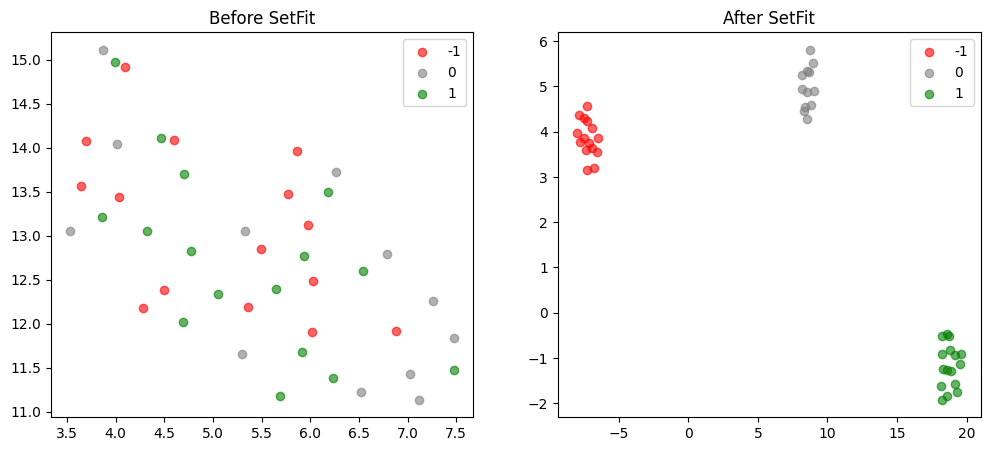

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for label, color in [(-1, "red"), (0, "gray"), (1, "green")]:
    subset = pre_training[pre_training["y"] == label]
    axes[0].scatter(subset[0], subset[1], c=color, label=str(label), alpha=0.6)

    subset = post_training[post_training["y"] == label]
    axes[1].scatter(subset[0], subset[1], c=color, label=str(label), alpha=0.6)

axes[0].set_title("Before SetFit")
axes[1].set_title("After SetFit")
axes[0].legend()
axes[1].legend()
plt.show()

In [33]:
test_base_embeddings = base_model.encode(test_data)
test_post_embeddings = model.encode(test_data)
len(test_base_embeddings)

97

In [34]:

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)

Xtest_base_2d   = reducer.fit_transform(test_base_embeddings)
Xtest_setfit_2d = reducer.fit_transform(test_post_embeddings)

/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [39]:
y_test = [x['label'] for x in test_data]
y_test = [-1 if x =='Against' else 0 if x =='Neutral' else 1 for x in y_test]


In [40]:
import pandas as pd
pre_test = pd.DataFrame(Xtest_base_2d)
pre_test['y'] = y_test
post_test = pd.DataFrame(Xtest_setfit_2d)
post_test['y'] = y_test


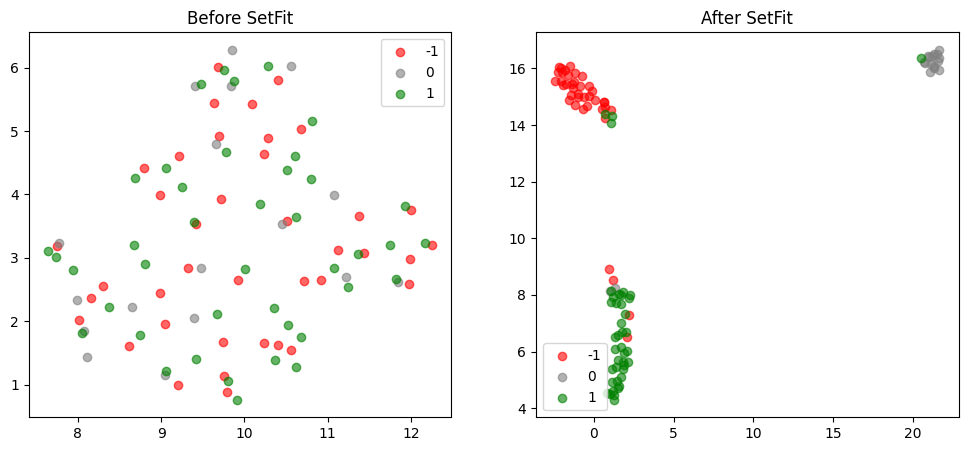

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for label, color in [(-1, "red"), (0, "gray"), (1, "green")]:
    subset = pre_test[pre_test["y"] == label]
    axes[0].scatter(subset[0], subset[1], c=color, label=str(label), alpha=0.6)

    subset = post_test[post_test["y"] == label]
    axes[1].scatter(subset[0], subset[1], c=color, label=str(label), alpha=0.6)

axes[0].set_title("Before SetFit")
axes[1].set_title("After SetFit")
axes[0].legend()
axes[1].legend()
plt.show()

In [60]:
def setfitembeddingvisualiser(basemodel,trainedmodel,df):
    base_embeddings = base_model.encode(df)
    trained_embeddings = trainedmodel.encode(df)


    reducer = umap.UMAP(
        n_neighbors=100,
        min_dist=1,
        metric="cosine",
        random_state=42
    )
    Xtest_base_2d   = reducer.fit_transform(base_embeddings)
    Xtest_setfit_2d = reducer.fit_transform(trained_embeddings)   
    
    y_test = [x['label'] for x in df]
    y_test = [-1 if x =='Against' else 0 if x =='Neutral' else 1 for x in y_test]
    pre_test = pd.DataFrame(Xtest_base_2d)
    pre_test['y'] = y_test
    post_test = pd.DataFrame(Xtest_setfit_2d)
    post_test['y'] = y_test

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for label, color in [(-1, "red"), (0, "gray"), (1, "green")]:
        subset = pre_test[pre_test["y"] == label]
        axes[0].scatter(subset[0], subset[1], c=color, label=str(label), alpha=0.6)

        subset = post_test[post_test["y"] == label]
        axes[1].scatter(subset[0], subset[1], c=color, label=str(label), alpha=0.6)

    axes[0].set_title("Before SetFit")
    axes[1].set_title("After SetFit")
    axes[0].legend()
    axes[1].legend()
    plt.show()


/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


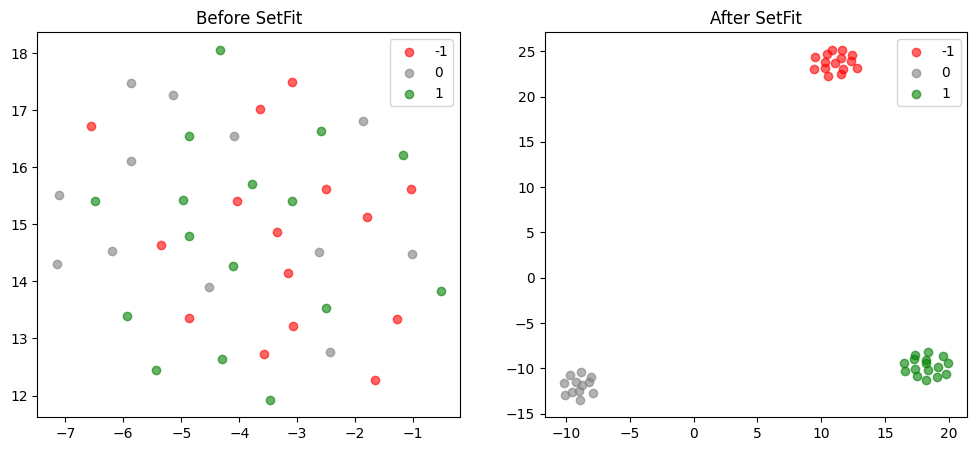

In [61]:
setfitembeddingvisualiser(base_model,model,raw_data)

/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


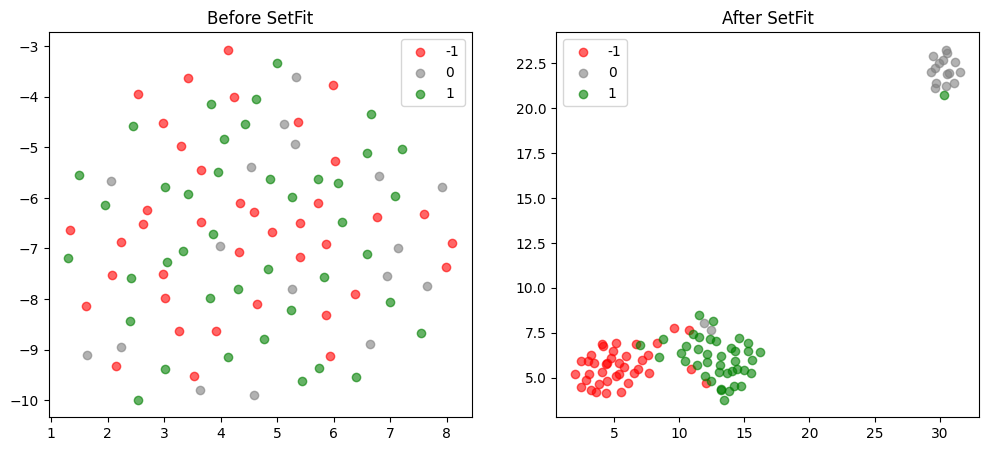

In [62]:
setfitembeddingvisualiser(base_model,model,test_data)

/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/gurusai/programming/PERSONAL_NEWS/.venv/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


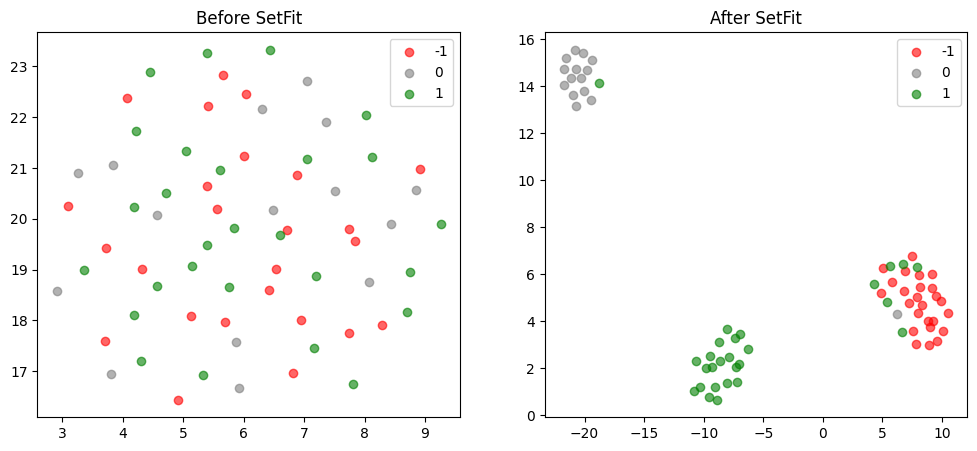

In [63]:
setfitembeddingvisualiser(base_model,model,finance_politics_test)